#### Cho bộ dữ liệu

X = [1, 2, 3, 4]
Y = [2, 1, 1, 3]

#### Xây dựng mạng Nơ - ron cho Bài toán hồi quy tuyến tính

In [266]:
import numpy as np
import matplotlib.pyplot as plt

In [267]:
X = np.array([[1],
              [2],
              [3],
              [4]])

Y = np.array([[2],
              [1],
              [1],
              [3]])

In [268]:
W1 = np.random.rand(1, 3)
W1

array([[0.52779434, 0.32738924, 0.95515224]])

In [269]:
b1 = np.random.rand(3, 1)
b1

array([[0.35953407],
       [0.69825998],
       [0.85932431]])

In [270]:

W2 = np.random.rand(3, 4)
W2

array([[0.95398401, 0.88064086, 0.76868905, 0.73616534],
       [0.23456265, 0.17044742, 0.60350136, 0.80096264],
       [0.45469235, 0.66145603, 0.40563624, 0.52384491]])

In [271]:
b2 = np.random.rand(4, 1)
b2

array([[0.37595462],
       [0.258123  ],
       [0.49382451],
       [0.17859498]])

In [272]:
W3 = np.random.rand(4, 1)
W3.shape

(4, 1)

In [273]:
b3 = np.random.rand(1, 1)
b3

array([[0.62946572]])

In [274]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [275]:
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

### Lan truyền xuôi

In [276]:
Z1 = X.dot(W1) + b1.T
Z1

array([[0.88732841, 1.02564923, 1.81447654],
       [1.41512275, 1.35303847, 2.76962878],
       [1.94291709, 1.68042772, 3.72478102],
       [2.47071143, 2.00781696, 4.67993326]])

In [277]:
H1 = sigmoid(Z1)
H1

array([[0.70833854, 0.73607154, 0.85990204],
       [0.80457268, 0.79462594, 0.94101238],
       [0.87467227, 0.84296116, 0.97644962],
       [0.92206291, 0.88161537, 0.99080569]])

In [278]:
Z2 = H1.dot(W2) + b2.T
Z2

array([[1.61534403, 1.57616374, 1.8313442 , 1.74007038],
       [1.75776479, 1.72454283, 1.97355728, 1.90030374],
       [1.85208935, 1.81795418, 2.07098706, 2.00918695],
       [1.91289369, 1.87577273, 2.13656694, 2.08255523]])

In [279]:
H2 = sigmoid(Z2)
H2

array([[0.83415201, 0.82866052, 0.86192178, 0.850696  ],
       [0.85292949, 0.84871306, 0.87799269, 0.8699259 ],
       [0.86437223, 0.86032046, 0.88805113, 0.88175828],
       [0.87134389, 0.86712482, 0.89440682, 0.88919604]])

In [280]:
Y_pred = H2.dot(W3) + b3.T
Y_pred

array([[2.11593528],
       [2.14733609],
       [2.16648362],
       [2.17828381]])

In [281]:
J = np.linalg.norm(Y_pred - Y)**2 / len(Y)
J

np.float64(0.8414306534489755)

### Lan truyền ngược

In [282]:
gradient_J_Y_pred = 2/len(Y) * (Y_pred - Y)
gradient_J_Y_pred

array([[ 0.05796764],
       [ 0.57366804],
       [ 0.58324181],
       [-0.41085809]])

In [283]:
gradient_J_H2 = gradient_J_Y_pred.dot(W3.T)
gradient_J_H2

array([[ 0.02216003,  0.02083998,  0.04493588,  0.01373207],
       [ 0.21930339,  0.20623974,  0.4447012 ,  0.13589735],
       [ 0.22296328,  0.20968161,  0.45212268,  0.1381653 ],
       [-0.15706396, -0.14770784, -0.31849271, -0.09732898]])

In [284]:
gradient_J_W3 = H2.T.dot(gradient_J_Y_pred)
gradient_J_b3 = gradient_J_W3.T.dot(np.ones((len(Y), 1)))

gradient_J_W3, gradient_J_b3

(array([[0.68379155],
        [0.68042467],
        [0.70411419],
        [0.69730643]]),
 array([[2.76563684]]))

In [285]:
gradient_J_Z2 = gradient_J_H2 * sigmoid_derivative(Z2)
gradient_J_Z2

array([[ 0.00306567,  0.00295891,  0.00534794,  0.00174414],
       [ 0.02750959,  0.02648102,  0.04763707,  0.01537744],
       [ 0.02613863,  0.02519726,  0.04494837,  0.0144052 ],
       [-0.01760745, -0.0170188 , -0.03007949, -0.00958948]])

In [286]:
gradient_J_H1 = gradient_J_Z2.dot(W2.T)
gradient_J_H1

array([[ 0.01092521,  0.00584791,  0.0064341 ],
       [ 0.09750241,  0.05203214,  0.05740315],
       [ 0.0922815 ,  0.04909039,  0.0543307 ],
       [-0.0619659 , -0.03286469, -0.0364879 ]])

In [287]:
gradient_J_W2 = H1.T.dot(gradient_J_Z2)
gradient_J_b2 = gradient_J_Z2.T.dot(np.ones(shape=(len(Y), 1)))

gradient_J_W2, gradient_J_b2

(array([[0.03093255, 0.02974875, 0.05369555, 0.01736544],
        [0.03062723, 0.02945675, 0.05316131, 0.01719192],
        [0.03660053, 0.03520487, 0.06351267, 0.0205348 ]]),
 array([[0.03910643],
        [0.03761839],
        [0.06785389],
        [0.0219373 ]]))

In [288]:
gradient_J_Z1 = gradient_J_H1 * sigmoid_derivative(Z1)
gradient_J_Z1

array([[ 0.0022571 ,  0.00113607,  0.00077512],
       [ 0.01533084,  0.00849141,  0.00318634],
       [ 0.01011596,  0.00649847,  0.00124938],
       [-0.00445305, -0.00343008, -0.0003324 ]])

In [289]:
gradient_J_W1 = X.T.dot(gradient_J_Z1)
gradient_J_b1 = gradient_J_Z1.T.dot(np.ones(shape=(len(Y), 1)))

gradient_J_W1, gradient_J_b1

(array([[0.04545446, 0.023894  , 0.00956634]]),
 array([[0.02325085],
        [0.01269588],
        [0.00487844]]))

In [ ]:
iter = 1000
tolerance = 1e-5
learning_rate = 0.1
step = 0
history = []

In [294]:
X = np.array([[1],
              [2],
              [3],
              [4]])

Y = np.array([[2],
              [1],
              [1],
              [3]])

W1 = np.random.rand(1, 3)
b1 = np.random.rand(3, 1)
W2 = np.random.rand(3, 4)
b2 = np.random.rand(4, 1)
W3 = np.random.rand(4, 1)
b3 = np.random.rand(1, 1)

while True:
    step += 1

    # Lan truyền tiến
    Z1 = X.dot(W1) + b1.T
    H1 = sigmoid(Z1)
    Z2 = H1.dot(W2) + b2.T
    H2 = sigmoid(Z2)
    Y_pred = H2.dot(W3) + b3.T
    J = np.linalg.norm(Y_pred - Y)**2 / len(Y)

    history.append(J)

    # Lan truyền ngược
    gradient_J_Y_pred = 2/len(Y) * (Y_pred - Y)

    gradient_J_H2 = gradient_J_Y_pred.dot(W3.T)
    gradient_J_W3 = H2.T.dot(gradient_J_Y_pred)
    gradient_J_b3 = gradient_J_W3.T.sum(axis=0)

    gradient_J_Z2 = gradient_J_H2 * sigmoid_derivative(Z2)
    gradient_J_H1 = gradient_J_Z2.dot(W2.T)
    gradient_J_W2 = H1.T.dot(gradient_J_Z2)
    gradient_J_b2 = gradient_J_Z2.T.sum(axis=0)

    gradient_J_Z1 = gradient_J_H1 * sigmoid_derivative(Z1)
    gradient_J_W1 = X.T.dot(gradient_J_Z1)
    gradient_J_b1 = gradient_J_Z1.T.sum(axis=0)


    W1 = W1 - learning_rate * gradient_J_W1
    b1 = b1 - learning_rate * gradient_J_b1

    W2 = W2 - learning_rate * gradient_J_W2
    b2 = b2 - learning_rate * gradient_J_b2

    W3 = W3 - learning_rate * gradient_J_W3
    b3 = b3 - learning_rate * gradient_J_b3

    if np.linalg.norm(gradient_J_W1) < tolerance and \
        np.linalg.norm(gradient_J_b1) < tolerance and \
        np.linalg.norm(gradient_J_W2) < tolerance and \
        np.linalg.norm(gradient_J_b2) < tolerance and \
        np.linalg.norm(gradient_J_W3) < tolerance and \
        np.linalg.norm(gradient_J_b3) < tolerance or \
        step >= iter:
        break


W3.shape

(4, 1)

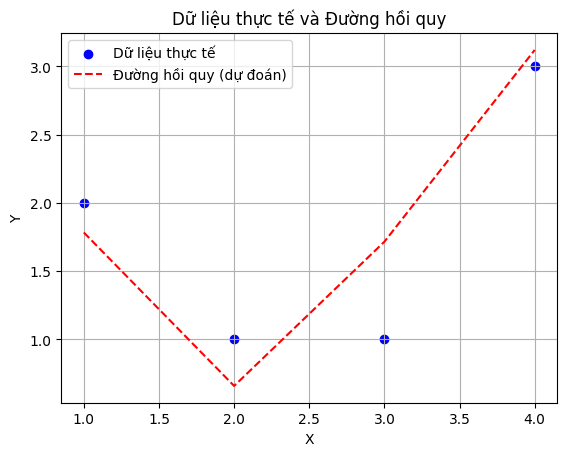

In [ ]:
Z1 = X.dot(W1) + b1.T
H1 = sigmoid(Z1)
Z2 = H1.dot(W2) + b2.T
H2 = sigmoid(Z2)
Y_pred_2 = H2.dot(W3) + b3.T


# Vẽ đồ thị dữ liệu thực tế và đường hồi quy
plt.scatter(X, Y, color='blue', label='Dữ liệu thực tế')  # Dữ liệu thực tế
plt.plot(X, Y_pred_2, color='red', label='Đường hồi quy (dự đoán)', linestyle='--')  # Đường hồi quy
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dữ liệu thực tế và Đường hồi quy')
plt.legend()
plt.grid(True)
plt.show()